## Import requirements

In [1]:
import gym
import os
from matplotlib import pyplot as plt
import pprint
# Visualization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import trange
from IPython import display as ipythondisplay
!pip install pyvirtualdisplay
from pyvirtualdisplay import Display
from gym.wrappers import RecordVideo
import base64
# %matplotlib inline
os.chdir('/content/drive/MyDrive/researchHub')
retval = os.getcwd()
print("当前工作目录为 : %s" % retval)
path = "highway-env" #@param {type: "string"}
os.chdir(path)
# path = "scripts" #@param {type: "string"}
# os.chdir(path)
retval = os.getcwd()
print("目录修改成功 : %s" % retval)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
当前工作目录为 : /content/drive/MyDrive/researchHub
目录修改成功 : /content/drive/MyDrive/researchHub/highway-env


In [2]:
#@markdown <h3>← 在修改完的目录下安装需要的仓库
repository = "https://github.com/kirk0306/stable-baselines3.git" #@param {type: "string"}
branchofrepository = "master" #@param {type: "string"}
!pip install git+{repository}@{branchofrepository}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kirk0306/stable-baselines3.git (to revision master) to /tmp/pip-req-build-o7fvdvcn
  Running command git clone -q https://github.com/kirk0306/stable-baselines3.git /tmp/pip-req-build-o7fvdvcn


In [3]:
import torch as th
from stable_baselines3 import PPO
from torch.distributions import Categorical
import torch
import torch.nn as nn
import numpy as np
from torch.nn import functional as F
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.vec_env import SubprocVecEnv
import highway_env
import time

In [4]:
if __name__ == "__main__":
    train = False
    if train:
        n_cpu = 32
        batch_size = 64
        env = make_vec_env("merge-v0", n_envs=n_cpu, vec_env_cls=SubprocVecEnv)
        model = PPO("MlpPolicy",
                    env,
                    policy_kwargs=dict(net_arch=[dict(pi=[256, 256], vf=[256, 256])]),
                    n_steps=24,
                    batch_size=batch_size,
                    n_epochs=10,
                    learning_rate=5e-4,
                    gamma=0.8,
                    verbose=2,
                    tensorboard_log="/content/drive/MyDrive/researchHub/highway-env/highway_ppo/")
        # Train the agent
        # model_loaded = PPO.load("/content/drive/MyDrive/researchHub/highway-env/highway_ppo/model")
        # model.set_parameters(model_loaded.get_parameters())
        model.learn(total_timesteps=int(3e5))
        # Save the agent
        model.save("/content/drive/MyDrive/researchHub/highway-env/highway_ppo/model")
        


/usr/local/lib/python3.7/dist-packages/gym/wrappers/record_video.py:42: UserWarning: WARN: Overwriting existing videos at /content/drive/MyDrive/researchHub/highway-env/highway_ppo/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  f"Overwriting existing videos at {self.video_folder} folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)"


feature rel obs:  [[[   1.  231.    0.   21.    0.    1.    0.]
  [   1.  -38.    1.    0.    5.    1.    0.]
  [   1.  -39.   11.    5.   -4.    1.   -0.]
  [   1.  -82.   14.    0.   -0.    1.   -0.]
  [   1. -117.    0.    3.    2.    1.    0.]]

 [[   1.  149.   14.   21.   -0.    1.   -0.]
  [   1.  -35.  -14.    3.    2.    1.    0.]
  [   1.  -40.    0.    1.    0.    1.    0.]
  [   1.   43.   -3.    5.   -4.    1.   -0.]
  [   1.   44.  -13.   -0.    5.    1.    0.]]]
feature ttc obs:  [[[[1.  1.  1.  1.  1.  1.  1. ]
   [0.  0.  0.  0.  0.  0.5 1. ]
   [0.  0.  0.  0.  0.  0.5 1. ]]]


 [[[1.  1.  1.  1.  1.  1.  1. ]
   [0.  0.  0.  0.  0.  0.  0. ]
   [1.  1.  1.  1.  1.  1.  1. ]]]]
feature rel obs:  [[[   1.  252.    0.   20.    0.    1.    0.]
  [   1.  -34.    8.    6.   -2.    1.   -0.]
  [   1.  -37.    4.    2.    1.    1.    0.]
  [   1.  -79.   13.    4.   -2.    1.   -0.]
  [   1. -114.    3.    3.    1.    1.    0.]]

 [[   1.  172.   13.   24.   -2.    1.   -0.]

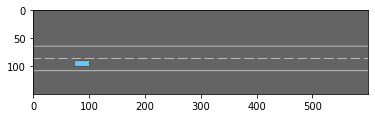

feature rel obs:  [[[  1.  37.   0.  29.   0.   1.   0.]
  [  1.  -6.  14.  -5.   0.   1.   0.]
  [  1.  37.   1.  -7.   4.   1.   0.]
  [  1.  73.  14.  -7.   0.   1.   0.]
  [  1.  79.   1.  -4.   4.   1.   0.]]

 [[  1. 148.  14.  21.   0.   1.   0.]
  [  1. -32. -14.   4.   4.   1.   0.]
  [  1. -38.   0.   1.   0.   1.   0.]
  [  1.  41.  -3.   2.  -3.   1.  -0.]
  [  1.  46. -14.   3.   0.   1.   0.]]]
feature ttc obs:  [[[[1.  1.  1.  1.  1.  1.  1. ]
   [0.  0.  0.  0.  0.5 1.  1. ]
   [0.  0.  0.  0.  0.  0.  0. ]]]


 [[[1.  1.  1.  1.  1.  1.  1. ]
   [0.  0.  0.  0.  0.  0.5 1. ]
   [1.  1.  1.  1.  1.  1.  1. ]]]]
feature rel obs:  [[[  1.  67.   0.  30.   0.   1.   0.]
  [  1. -12.  14.  -6.   0.   1.   0.]
  [  1.  29.   4.  -8.   1.   1.   0.]
  [  1.  65.  14.  -7.   0.   1.   0.]
  [  1.  75.   4.  -4.   1.   1.   0.]]

 [[  1. 169.  14.  20.  -2.   1.  -0.]
  [  1. -27. -10.   6.   3.   1.   0.]
  [  1. -37.   1.   2.   2.   1.   0.]
  [  1.  43.  -5.   3.  -1.   1. 

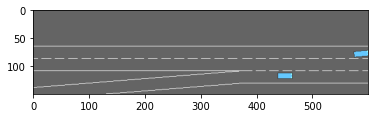

feature rel obs:  [[[  1. 157.   0.  25.   0.   1.   0.]
  [  1.  -7.  14.   0.  -0.   1.  -0.]
  [  1.  37.  11.   4.  -4.   1.  -0.]
  [  1.  41.   0.   2.   0.   1.   0.]
  [  1. -42.   1.  -2.   4.   1.   0.]]

 [[  1. 194.  11.  29.  -4.   1.  -0.]
  [  1.   4. -11.  -2.   4.   1.   0.]
  [  1.  35.  -2.  -3.   1.   1.  -0.]
  [  1. -37. -11.  -4.   4.   1.   0.]
  [  1. -44.   4.  -3.   4.   1.  -0.]]]
feature ttc obs:  [[[[1.  1.  1.  1.  1.  1.  1. ]
   [0.  0.  0.  0.  0.  0.  0. ]
   [0.  0.  0.  0.  0.  0.  0. ]]]


 [[[1.  1.  1.  1.  1.  1.  1. ]
   [0.  1.  1.  0.5 0.  0.  0. ]
   [1.  1.  1.  1.  1.  1.  1. ]]]]
feature rel obs:  [[[  1. 184.   0.  29.   0.   1.   0.]
  [  1. -10.  13.  -5.  -2.   1.  -0.]
  [  1.  39.   8.   1.  -1.   1.  -0.]
  [  1.  40.   0.  -2.   0.   1.   0.]
  [  1. -46.   4.  -6.   1.   1.   0.]]

 [[  1. 224.   8.  30.  -1.   1.  -0.]
  [  1.   1.  -8.  -3.   1.   1.   0.]
  [  1.  28.  -2. -10.  -3.   1.  -0.]
  [  1. -39.  -8.  -1.   1.   1. 

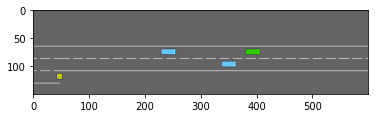

feature rel obs:  [[[  1. 157.   0.  29.   0.   1.   0.]
  [  1.  -7.  14.  -3.  -0.   1.  -0.]
  [  1.  33.  11.  -3.  -4.   1.  -0.]
  [  1.  38.   1.  -7.   4.   1.   0.]
  [  1. -46.  14.  -0.   0.   1.   0.]]

 [[  1. 112.  14.  29.   0.   1.   0.]
  [  1. -37. -11.  -4.   3.   1.   0.]
  [  1.  39.  -0.  -3.  -0.   1.  -0.]
  [  1. -42.   0.  -5.   0.   1.   0.]
  [  1.  46. -14.   0.   0.   1.   0.]]]
feature ttc obs:  [[[[1.  1.  1.  1.  1.  1.  1. ]
   [0.  0.  0.  0.  0.5 1.  1. ]
   [0.  0.  0.  0.  0.  0.  0. ]]]


 [[[1.  1.  1.  1.  1.  1.  1. ]
   [0.  0.  0.  0.  0.  0.  0. ]
   [1.  1.  1.  1.  1.  1.  1. ]]]]
feature rel obs:  [[[  1. 187.   0.  30.   0.   1.   0.]
  [  1. -12.  13.  -6.  -2.   1.  -0.]
  [  1.  30.   8.  -3.  -2.   1.  -0.]
  [  1.  31.   4.  -6.   1.   1.   0.]
  [  1. -48.  14.  -4.   0.   1.   0.]]

 [[  1. 139.  14.  26.   0.   1.   0.]
  [  1.  36.  -1.  -2.  -2.   1.  -0.]
  [  1. -39. -11.  -0.   0.   1.   0.]
  [  1. -46.   0.  -2.   0.   1. 

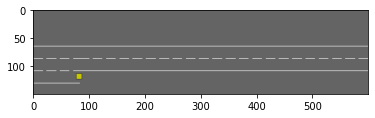

feature rel obs:  [[[  1. 156.   0.  25.   0.   1.   0.]
  [  1.  -4.  14.  -0.  -0.   1.  -0.]
  [  1.  34.  11.  -1.  -3.   1.  -0.]
  [  1.  39.   1.  -3.   5.   1.   0.]
  [  1. -41.   0.  -3.   0.   1.   0.]]

 [[  1.  34.  14.  29.   0.   1.   0.]
  [  1.  40. -11.  -6.   2.   1.   0.]
  [  1.  76.   0.  -6.   0.   1.   0.]
  [  1.  81. -14.  -7.   0.   1.   0.]
  [  1. 118.  -0.  -5.  -0.   1.  -0.]]]
feature ttc obs:  [[[[1.  1.  1.  1.  1.  1.  1. ]
   [0.  0.  0.  0.  0.5 0.5 0. ]
   [0.  0.  0.  0.  0.5 0.5 0. ]]]


 [[[1.  1.  1.  1.  1.  1.  1. ]
   [0.  0.  0.  0.  0.  0.5 1. ]
   [1.  1.  1.  1.  1.  1.  1. ]]]]
feature rel obs:  [[[  1. 181.   0.  25.   0.   1.   0.]
  [  1.  -6.  13.  -3.  -2.   1.  -0.]
  [  1.  33.   9.  -1.  -2.   1.  -0.]
  [  1.  37.   4.  -1.   1.   1.   0.]
  [  1. -44.   0.  -3.   0.   1.   0.]]

 [[  1.  64.  14.  30.   0.   1.   0.]
  [  1.  34. -11.  -6.   0.   1.   0.]
  [  1.  70.   0.  -6.   0.   1.   0.]
  [  1.  74. -14.  -8.   0.   1. 

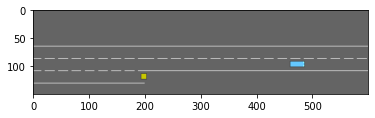

feature rel obs:  [[[  1. 117.   0.  29.   0.   1.   0.]
  [  1.  -6.  14.  -5.   0.   1.   0.]
  [  1.  36.  14.  -3.  -0.   1.  -0.]
  [  1.  38.   0.  -7.   0.   1.   0.]
  [  1.  77.  11.  -0.  -4.   1.  -0.]]

 [[  1. 194.  11.  29.  -4.   1.  -0.]
  [  1.   1.  -8.  -6.   7.   1.   0.]
  [  1.  36.  -2.  -4.   2.   1.  -0.]
  [  1. -39. -11.  -6.   4.   1.   0.]
  [  1.  41. -11.  -4.   4.   1.   0.]]]
feature ttc obs:  [[[[1.  1.  1.  1.  1.  1.  1. ]
   [0.  0.  0.  0.  0.5 1.  1. ]
   [0.  0.  0.  0.  0.  0.  0. ]]]


 [[[1.  1.  1.  1.  1.  1.  1. ]
   [1.  1.  0.  0.  0.  0.  1. ]
   [1.  1.  1.  1.  1.  1.  1. ]]]]
feature rel obs:  [[[  1. 144.   0.  26.   0.   1.   0.]
  [  1.  -9.  14.  -1.   0.   1.   0.]
  [  1.  33.   0.  -2.   0.   1.   0.]
  [  1.  34.  13.  -1.  -3.   1.  -0.]
  [  1.  74.   4.  -2.   0.   1.   0.]]

 [[  1. 223.   8.  30.  -1.   1.  -0.]
  [  1.  -5.  -4.  -6.   2.   1.   0.]
  [  1.  28.  -3.  -9.  -1.   1.  -0.]
  [  1.  36.  -8.  -5.   1.   1. 

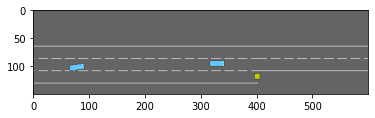

feature rel obs:  [[[  1. 195.   0.  25.   0.   1.   0.]
  [  1.  -6.  12.  -2.  -3.   1.  -0.]
  [  1.  34.   9.   1.  -3.   1.  -0.]
  [  1.  41.   0.   1.   0.   1.   0.]
  [  1. -41.   3.  -1.   2.   1.   0.]]

 [[  1.  71.  14.  29.   0.   1.   0.]
  [  1.   2. -12.  -7.   4.   1.   0.]
  [  1.  40.   0.  -2.   0.   1.   0.]
  [  1. -41.   0.  -6.   0.   1.   0.]
  [  1.  44. -14.  -6.  -0.   1.  -0.]]]
feature ttc obs:  [[[[1.  1.  1.  1.  1.  1.  1. ]
   [0.  0.  0.  0.  0.  0.  0. ]
   [0.  0.  0.  0.  0.  0.  0. ]]]


 [[[1.  1.  1.  1.  1.  1.  1. ]
   [1.  1.  0.  0.  0.  0.5 1. ]
   [1.  1.  1.  1.  1.  1.  1. ]]]]
feature rel obs:  [[[  1. 220.   0.  25.   0.   1.   0.]
  [  1.  -8.   9.  -1.  -2.   1.  -0.]
  [  1.  32.   7.  -5.  -4.   1.  -0.]
  [  1. -41.   4.   0.   0.   1.   0.]
  [  1.  42.   0.   1.   0.   1.   0.]]

 [[  1.  98.  14.  26.   0.   1.   0.]
  [  1.  -2. -11.  -2.   1.   1.   0.]
  [  1.  40.   0.   1.   0.   1.   0.]
  [  1.  40. -14.  -2.  -0.   1. 

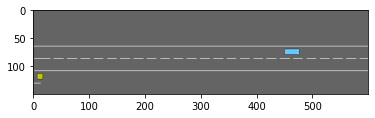

feature rel obs:  [[[  1.  79.   0.  29.   0.   1.   0.]
  [  1. -10.  14.  -5.   0.   1.   0.]
  [  1.  34.  14.  -0.   0.   1.   0.]
  [  1.  35.   0.  -7.   0.   1.   0.]
  [  1. -46.   3.  -6.   3.   1.   0.]]

 [[  1. 114.  14.  29.   0.   1.   0.]
  [  1.   0. -14.  -7.   0.   1.   0.]
  [  1. -34. -14.   0.   0.   1.   0.]
  [  1.  38.  -0.  -4.  -0.   1.  -0.]
  [  1.  40. -12.  -6.   4.   1.   0.]]]
feature ttc obs:  [[[[1.  1.  1.  1.  1.  1.  1. ]
   [0.  0.  0.  0.  1.  1.  0.5]
   [0.  0.  0.  0.  0.  0.  0. ]]]


 [[[1.  1.  1.  1.  1.  1.  1. ]
   [1.  1.  0.  0.  0.5 1.  1. ]
   [1.  1.  1.  1.  1.  1.  1. ]]]]
feature rel obs:  [[[  1. 109.   0.  30.   0.   1.   0.]
  [  1. -16.  14.  -6.   0.   1.   0.]
  [  1.  27.   0.  -7.   0.   1.   0.]
  [  1.  34.  14.  -0.   0.   1.   0.]
  [  1. -52.   4.  -6.   0.   1.   0.]]

 [[  1. 143.  14.  30.   0.   1.   0.]
  [  1.  -7. -14.  -7.   0.   1.   0.]
  [  1.  32.  -1.  -8.  -2.   1.  -0.]
  [  1.  34. -11.  -6.   1.   1. 

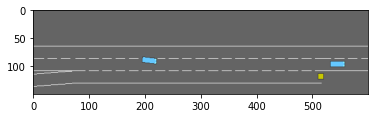

feature rel obs:  [[[  1.  35.   0.  25.   0.   1.   0.]
  [  1.  -5.  14.  -1.   0.   1.   0.]
  [  1.  40.  14.   4.   0.   1.   0.]
  [  1.  40.   2.  -2.   4.   1.   0.]
  [  1.  75.  14.  -1.   0.   1.   0.]]

 [[  1.  74.  14.  29.   0.   1.   0.]
  [  1.   1. -12.  -7.   4.   1.   0.]
  [  1.  35.   0.  -5.   0.   1.   0.]
  [  1.  38. -14.  -7.   0.   1.   0.]
  [  1. -40. -14.  -4.   0.   1.   0.]]]
feature ttc obs:  [[[[1.  1.  1.  1.  1.  1.  1. ]
   [0.  0.  0.  0.  0.  0.  0. ]
   [0.  0.  0.  0.  0.  0.  0. ]]]


 [[[1.  1.  1.  1.  1.  1.  1. ]
   [1.  1.  0.  0.  0.5 1.  1. ]
   [1.  1.  1.  1.  1.  1.  1. ]]]]
feature rel obs:  [[[  1.  60.   0.  25.   0.   1.   0.]
  [  1.  -7.  14.  -1.   0.   1.   0.]
  [  1.  39.   4.  -1.   0.   1.   0.]
  [  1.  44.  14.   5.   0.   1.   0.]
  [  1.  74.  14.  -0.   0.   1.   0.]]

 [[  1. 104.  14.  30.   0.   1.   0.]
  [  1.  -6. -11.  -6.   0.   1.   0.]
  [  1.  30.   0.  -5.   0.   1.   0.]
  [  1.  31. -14.  -7.   0.   1. 

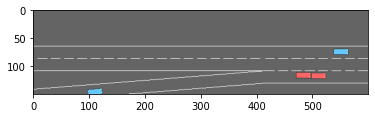

feature rel obs:  [[[  1. 113.   0.  21.   0.   1.   0.]
  [  1.  38.  14.   5.  -0.   1.  -0.]
  [  1. -40.   2.   0.   4.   1.   0.]
  [  1. -44.  14.   4.   0.   1.   0.]
  [  1.  80.   3.   2.   4.   1.   0.]]

 [[  1. 194.  11.  29.  -4.   1.  -0.]
  [  1.  -0.  -8.  -6.   8.   1.   0.]
  [  1.  36.  -2.  -5.   2.   1.  -0.]
  [  1.  41. -11.  -3.   4.   1.   0.]
  [  1. -42.   4.  -3.   4.   1.  -0.]]]
feature ttc obs:  [[[[1.  1.  1.  1.  1.  1.  1. ]
   [0.  0.  0.  0.  0.  0.  0. ]
   [0.  0.  0.  0.  0.  0.  0. ]]]


 [[[1.  1.  1.  1.  1.  1.  1. ]
   [0.5 0.5 0.  0.  0.  0.5 1. ]
   [1.  1.  1.  1.  1.  1.  1. ]]]]
feature rel obs:  [[[  1. 134.   0.  20.   0.   1.   0.]
  [  1. -38.   4.   2.   1.   1.   0.]
  [  1. -39.  14.   5.   0.   1.   0.]
  [  1.  43.  13.   5.  -3.   1.  -0.]
  [  1. -80.   0.   1.  -0.   1.  -0.]]

 [[  1. 223.   8.  30.  -1.   1.  -0.]
  [  1.  -6.  -4.  -6.   2.   1.   0.]
  [  1.  28.  -2. -11.  -3.   1.  -0.]
  [  1.  38.  -8.  -3.   1.   1. 

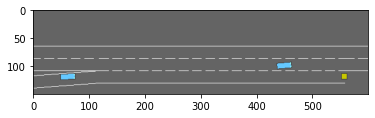

feature rel obs:  [[[   1.   36.    0.   25.    0.    1.    0.]
  [   1.   -6.   14.   -2.    0.    1.    0.]
  [   1.   34.   14.   -1.    0.    1.    0.]
  [   1.   39.    0.   -2.   -0.    1.   -0.]
  [   1.   76.   14.    2.    0.    1.    0.]]

 [[   1.  233.    9.   29.   -2.    1.   -0.]
  [   1.    3.   -9.   -4.    2.    1.    0.]
  [   1.  -39.   -6.   -6.    5.    1.    0.]
  [   1.  -43.    3.   -5.   -1.    1.   -0.]
  [   1. -119.   -6.   -4.    6.    1.    0.]]]
feature ttc obs:  [[[[1. 1. 1. 1. 1. 1. 1.]
   [0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0.]
   [1. 1. 1. 1. 1. 1. 1.]]]]
feature rel obs:  [[[   1.   61.    0.   25.    0.    1.    0.]
  [   1.   -9.   14.   -3.    0.    1.    0.]
  [   1.   33.   14.   -2.    0.    1.    0.]
  [   1.   36.    0.   -3.   -0.    1.   -0.]
  [   1.   78.   14.    2.    0.    1.    0.]]

 [[   1.  263.    5.   30.   -2.    1.   -0.]
  [   1.   -1.   -5.   -4.    2.    1.   

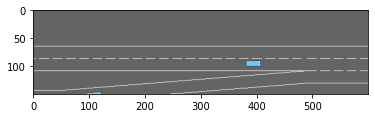

feature rel obs:  [[[   1.  234.    0.   21.    0.    1.    0.]
  [   1.   -3.    9.    4.   -2.    1.   -0.]
  [   1.  -39.    1.    1.    5.    1.    0.]
  [   1.  -42.   11.    3.   -3.    1.   -0.]
  [   1. -119.    3.    5.    2.    1.    0.]]

 [[   1.   67.   14.   21.    0.    1.    0.]
  [   1.    8.  -14.    2.    0.    1.    0.]
  [   1.  -33.  -11.    2.    3.    1.    0.]
  [   1.  -39.    0.    1.    0.    1.    0.]
  [   1.   45.    0.    5.    0.    1.    0.]]]
feature ttc obs:  [[[[1. 1. 1. 1. 1. 1. 1.]
   [0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0.]]]


 [[[1. 1. 1. 1. 1. 1. 1.]
   [0. 0. 0. 0. 0. 0. 0.]
   [1. 1. 1. 1. 1. 1. 1.]]]]
feature rel obs:  [[[   1.  255.    0.   20.    0.    1.    0.]
  [   1.   -2.    6.   -1.   -4.    1.   -0.]
  [   1.  -37.    4.    4.    1.    1.    0.]
  [   1.  -39.    8.    4.   -2.    1.   -0.]
  [   1. -115.    4.    5.    0.    1.    0.]]

 [[   1.   88.   14.   20.    0.    1.    0.]
  [   1.   12.  -14.    4.    0.    1.   

KeyboardInterrupt: 

In [5]:
    model = PPO.load("/content/drive/MyDrive/researchHub/highway-env/highway_ppo/model", device="cpu")
    env = gym.make("merge-v0")
    env.configure({"offscreen_rendering": True})
    env = RecordVideo(env, video_folder='/content/drive/MyDrive/researchHub/highway-env/highway_ppo/video', 
              episode_trigger=lambda e: True)  # record all episodes
    env.unwrapped.set_record_video_wrapper(env)          
    # img = env.render(mode='rgb_array')
    while True:
        obs = env.reset()
        done = [False]
        while not all(done):
            action, _ = model.predict(obs)
            # obs, reward, done, info = env.step(np.array([0,0],dtype=np.float32))
            obs, reward, done, info = env.step(tuple([a for a in action]))
            env.render()
            time.sleep(0.3)
        plt.imshow(env.render(mode="rgb_array"))
        plt.show()
        